## 911 Calls

### Analyzing 911 Dataset obtained from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) using python libraries like numpy, pandas, matplotlib and seaborn


#### Importing usefull Python libraries

In [2]:
#Data analysis
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Load Dataset

In [3]:
df = pd.read_csv('911.csv')

### Understanding Data
#### Data Info : 
Gives us an overall idea of what data contains and in which format( datatypes ), 
#### Note : Object Dtype is basically String

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


#### What we know now :

1. Data Contains 9 Columns.
2. Three Floats, One int & Five Strings (object)
3. Total Rows 99491

#### Checking few rows of data

In [34]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


#### Zipcodes with most 911 calls

In [35]:
df['zip'].value_counts().head(5) 

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### Townships with most 911 calls

In [37]:
df['twp'].value_counts().head(5) # Top 5 townships

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### Unique Titles for 911 calls

In [38]:
df['title'].nunique() # Unique Titles

110

### Creating new features

Creating a new feature and creating a column in dataframe with name 'Reason'. This column should contain codes mentioned in 'title' column. e.g For title EMS: BACK PAINS/INJURY, Reason should be 'EMS'

In [39]:
df['reason'] = df['title'].apply( lambda x : x.split(':')[0])

In [42]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


#### Reason for 911 calls

In [43]:
#Most Common Reasons for 911 calls
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

### Visualizing Data


#### Reason Distribution ( Countplot with reason )

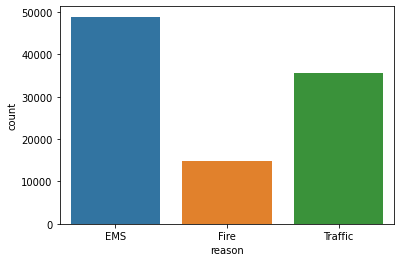

In [44]:
sns.countplot(x = 'reason', data = df)

### Timestamp Column:
See what data type timestamp column is? , Typically it should be datetime. If its a string convert it into datetime using [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) 

In [46]:
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

Its a string, We have to convert it to datetime

In [48]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [51]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

Now we can grab diff element of timestamp easily.

In [61]:
time.hour

17

In [62]:
time.month

12

In [63]:
time.dayofweek

3

#### Creating Hour, Month and DayOfWeek column Now

In [85]:
df['hour'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x).hour )

In [86]:
df['hour'].head()

0    17
1    17
2    17
3    17
4    17
Name: hour, dtype: int64

In [87]:
df['month'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x).month )

In [88]:
df['month'].head()

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

In [89]:
df['dayofweek'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x).dayofweek )

In [90]:
df['dayofweek'].head()

0    3
1    3
2    3
3    3
4    3
Name: dayofweek, dtype: int64

#### Map daysofweek column with actual name of day

In [91]:
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [92]:
df['dayofweek'] = df['dayofweek'].map(days)

In [93]:
df['dayofweek'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: dayofweek, dtype: object

In [95]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu


#### Visualiziong 911 Call distribution wrt Days

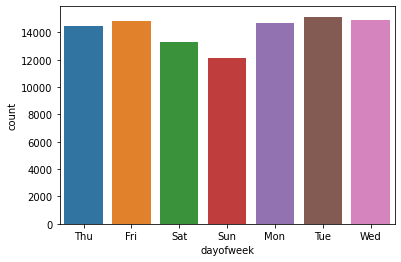

In [102]:
sns.countplot(x = 'dayofweek', data = df)

#### 911 call distribution by days and for each reason

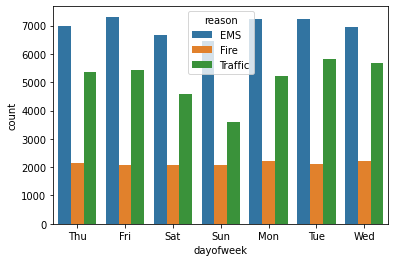

In [103]:
sns.countplot( x = 'dayofweek', data = df, hue = 'reason')

#### #### 911 call distribution by months and for each reason

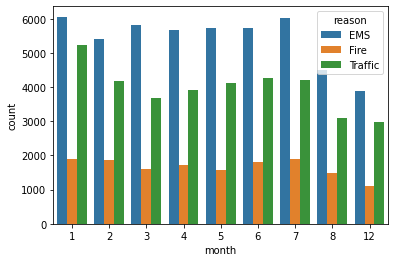

In [104]:
sns.countplot(x = 'month', data = df, hue = 'reason')

#### Notices something strange? There is no data for the month of 9,10,11